<a href="https://colab.research.google.com/github/Akshitha246/hedera/blob/main/DMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-af52cb6c9104>:18: DtypeWarning: Columns (4,76,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='latin1')
<ipython-input-5-af52cb6c9104>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['imonth'] = data['imonth'].replace(0, 1)
<ipython-input-5-af52cb6c9104>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['iday'] = data['iday'].replace(0, 1)
<ipython-input-5-af52cb6c9104>:38: 

Dataset dimensions: (7316, 135)
   iyear  imonth  iday   latitude   longitude  nperps  nkill  nwound  \
0   1970       7     2  18.456792  -69.951164     NaN    1.0     0.0   
1   1970       1     1  19.371887  -99.086624     7.0    0.0     0.0   
2   1970       1     1  15.478598  120.599741     NaN    1.0     0.0   
3   1970       1     1  37.997490   23.762728     NaN    NaN     NaN   
4   1970       1     1  33.580412  130.396361     NaN    NaN     NaN   

   nkillter  propextent                 attacktype1_txt weaptype1_txt  \
0       NaN         NaN                   Assassination       Unknown   
1       NaN         NaN     Hostage Taking (Kidnapping)       Unknown   
2       NaN         NaN                   Assassination       Unknown   
3       NaN         NaN               Bombing/Explosion    Explosives   
4       NaN         NaN  Facility/Infrastructure Attack    Incendiary   

                                gname                targtype1_txt  \
0                         

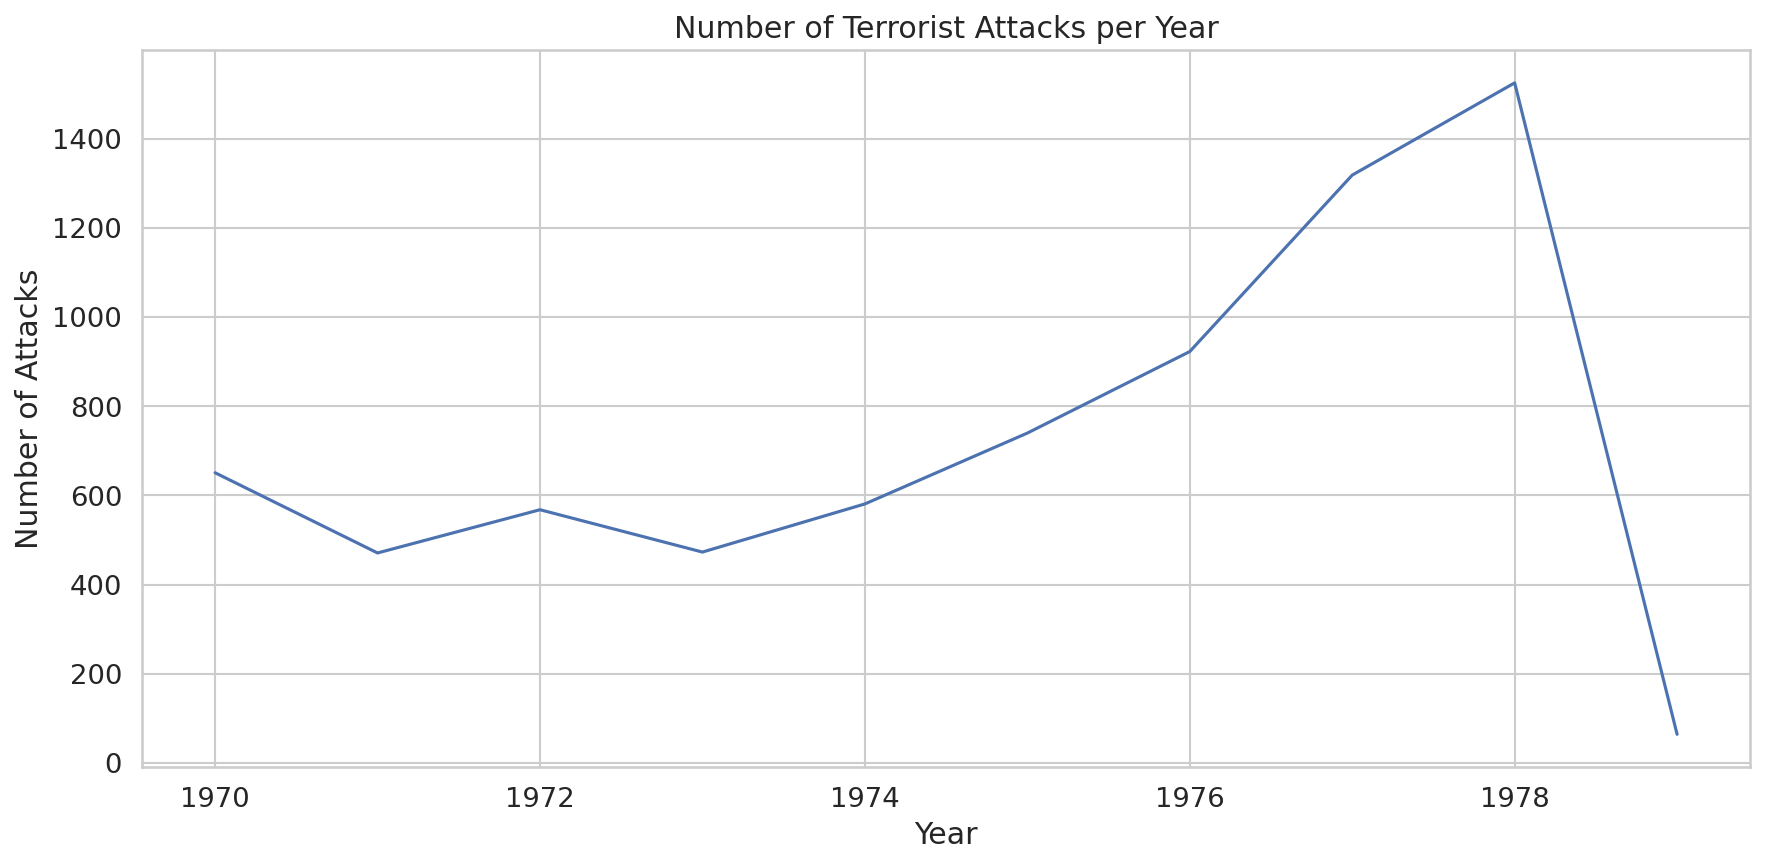

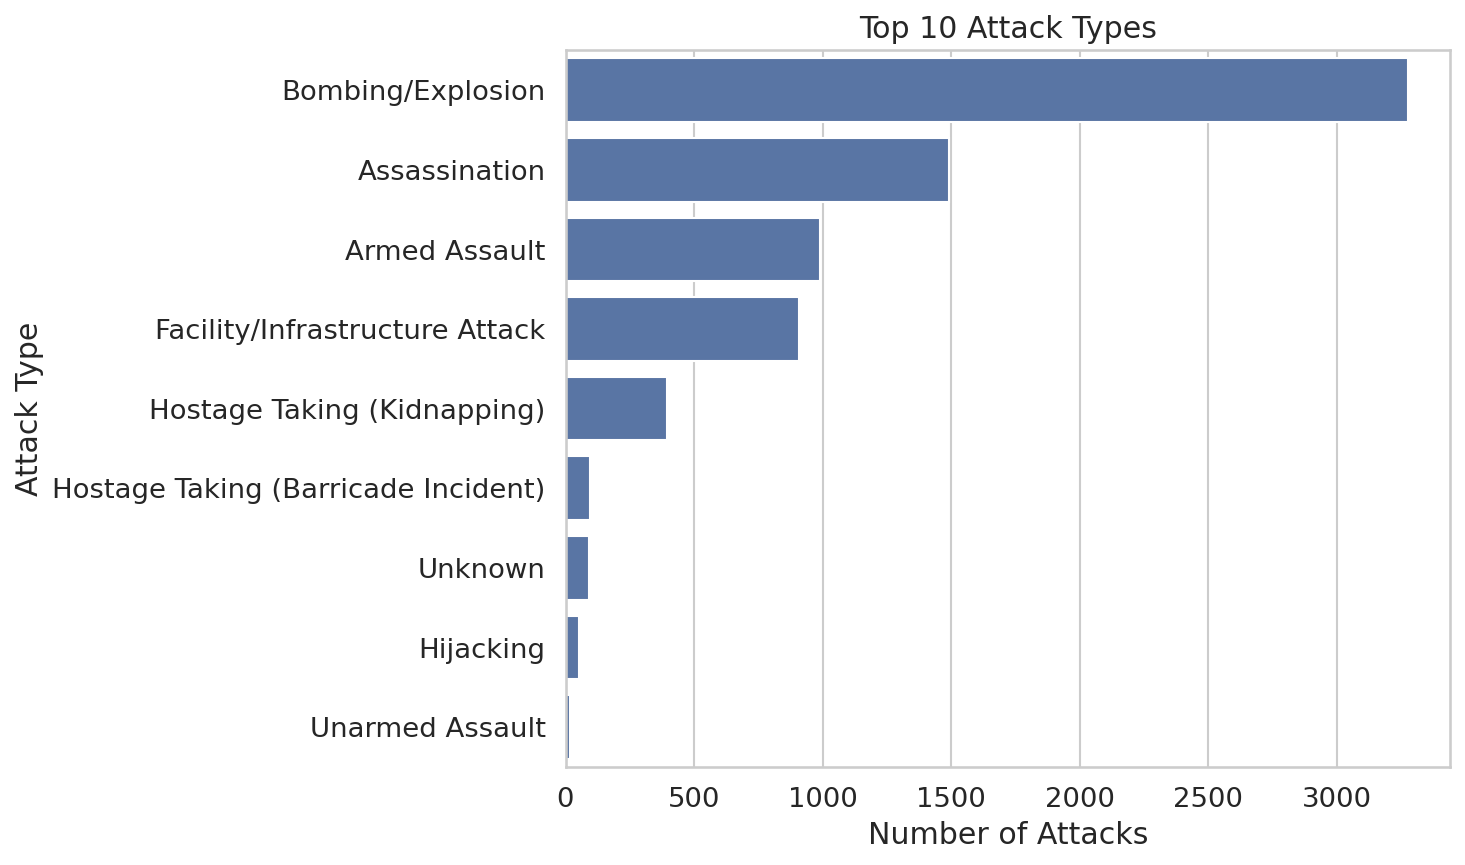

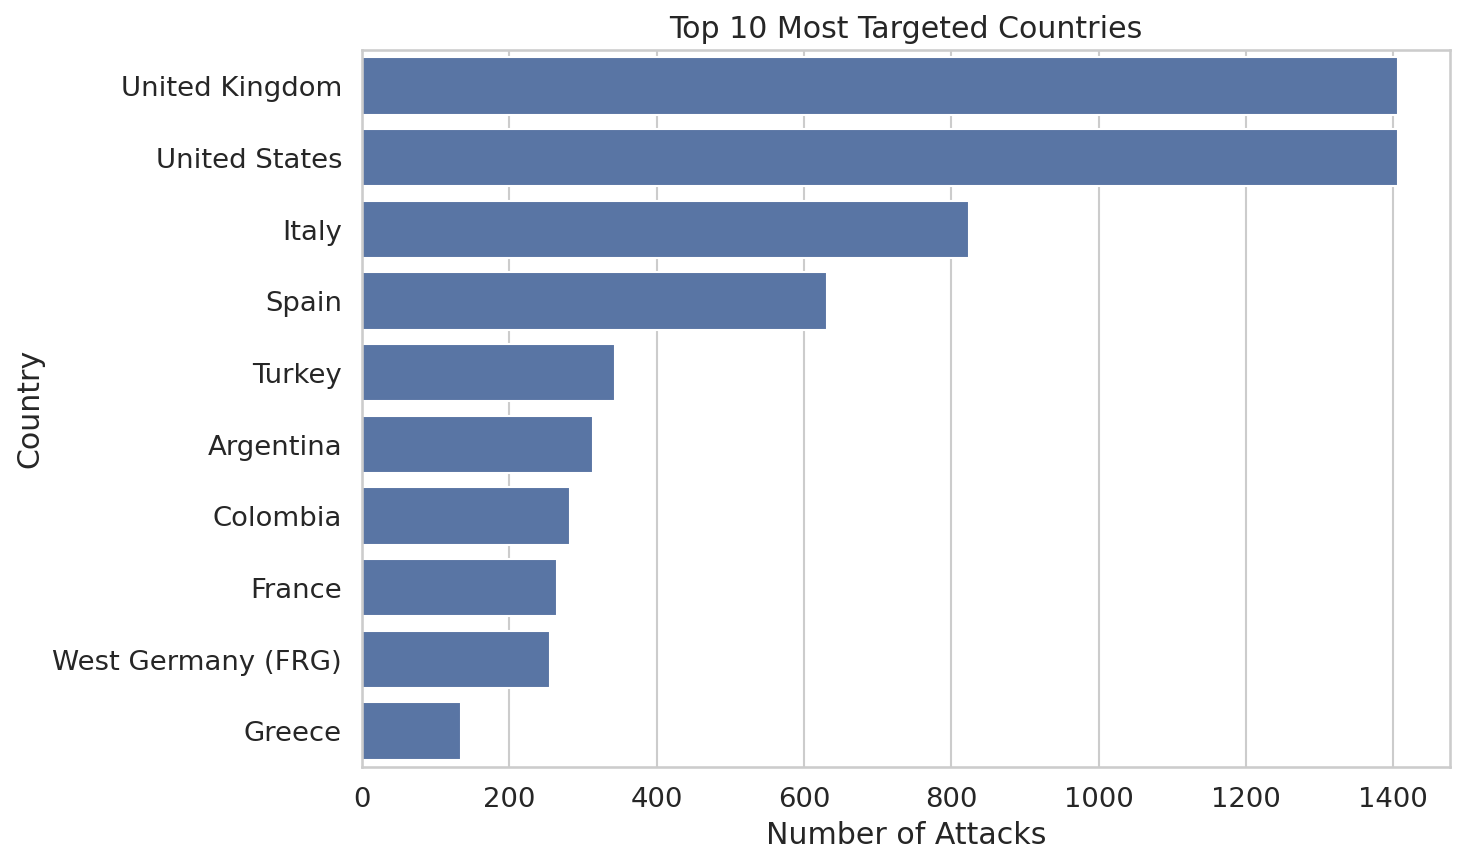

<ipython-input-5-af52cb6c9104>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_kills.values, y=weapon_kills.index, palette="Reds_r")


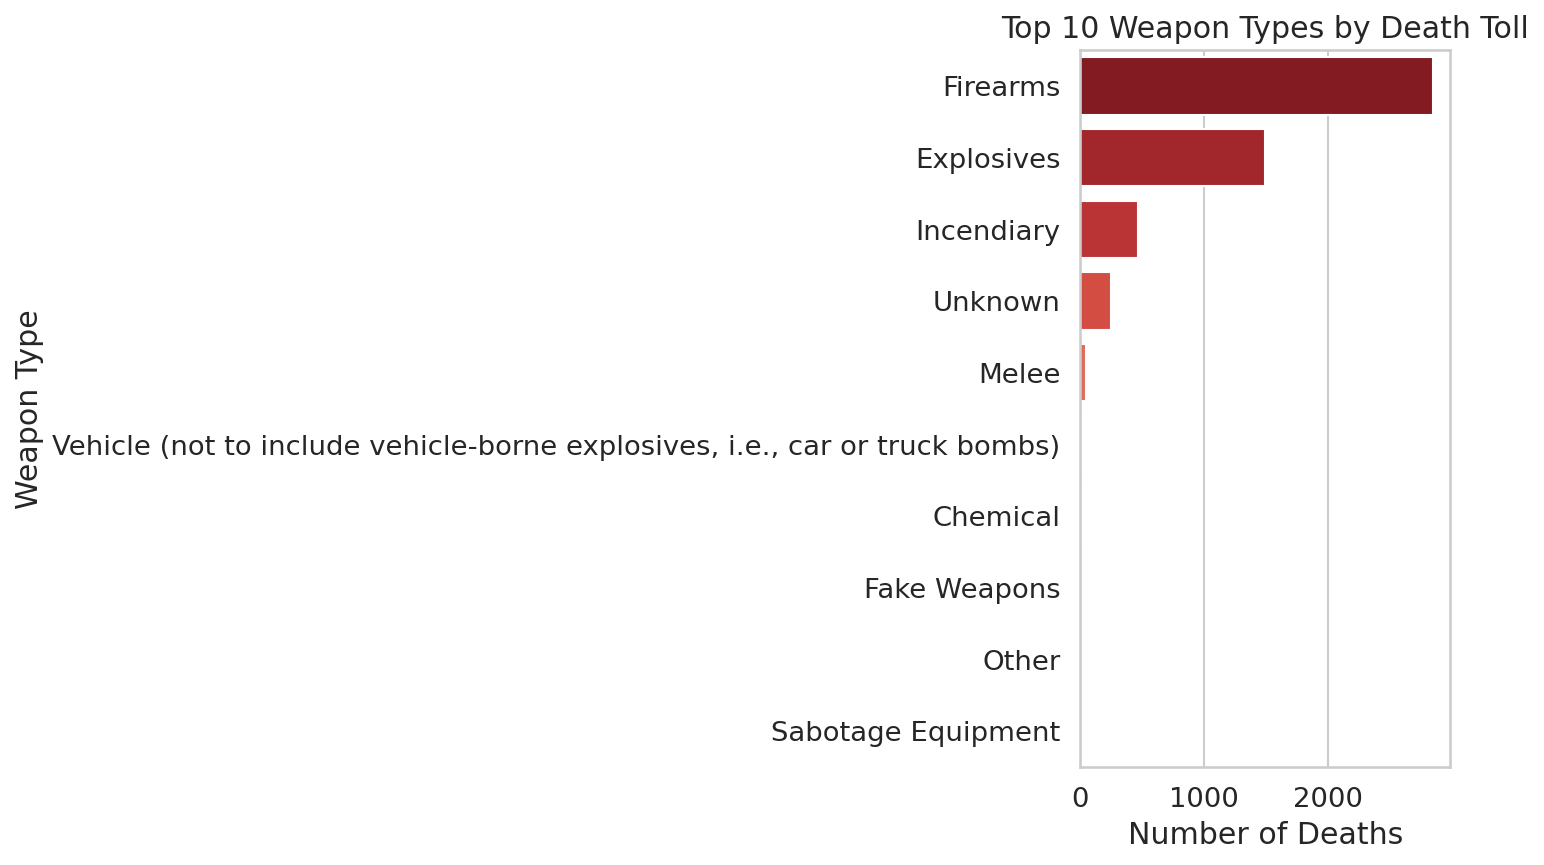

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Geospatial libraries if needed later
# import geopandas as gpd
# import plotly.express as px

# Set default plot settings (mimicking the R theme)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (7, 7)
sns.set(style='whitegrid', font_scale=1.2)

# Read dataset
#data = pd.read_csv("./data/globalterrorismdb_0718dist.csv", encoding='latin1')  # Use correct path
# Corrected file path — assuming the CSV file is alongside the notebook
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='latin1')
#data = pd.read_csv("/content/Data-Analytics-Projects-in-python/globalterrorismdb_0718dist.csv", encoding='latin1')

# Print dataset shape
print("Dataset dimensions:", data.shape)

# Select relevant columns
columns_of_interest = [
    'iyear', 'imonth', 'iday',
    'latitude', 'longitude',
    'nperps', 'nkill', 'nwound', 'nkillter', 'propextent',
    'attacktype1_txt', 'weaptype1_txt',
    'gname', 'targtype1_txt', 'natlty1_txt', 'region_txt', 'country_txt'
]

data = data[columns_of_interest]

# Convert date columns into a single datetime column
data['imonth'] = data['imonth'].replace(0, 1)
data['iday'] = data['iday'].replace(0, 1)
data['date'] = pd.to_datetime(dict(year=data.iyear, month=data.imonth, day=data.iday), errors='coerce')

# Preview the cleaned dataset
print(data.head())

# Example 1: Terror attacks per year
attacks_per_year = data['iyear'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title("Number of Terrorist Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.tight_layout()
plt.show()

# Example 2: Most common attack types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='attacktype1_txt', order=data['attacktype1_txt'].value_counts().index[:10])
plt.title("Top 10 Attack Types")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Type")
plt.tight_layout()
plt.show()

# Example 3: Most targeted countries
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='country_txt', order=data['country_txt'].value_counts().index[:10])
plt.title("Top 10 Most Targeted Countries")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Example 4: Death toll by weapon type
weapon_kills = data.groupby('weaptype1_txt')['nkill'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_kills.values, y=weapon_kills.index, palette="Reds_r")
plt.title("Top 10 Weapon Types by Death Toll")
plt.xlabel("Number of Deaths")
plt.ylabel("Weapon Type")
plt.tight_layout()
plt.show()

# Optional: Save cleaned data
# data.to_csv("cleaned_terrorism_data.csv", index=False)
